<a href="https://colab.research.google.com/github/Nilswonderland/Portfolio/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import Libraries & Data

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from yellowbrick.classifier import PrecisionRecallCurve

from scipy.stats import skew
from scipy.cluster.hierarchy import linkage

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [4]:
df= pd.read_csv('Churn_Modelling.csv')

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
df.shape

(10000, 14)

In [9]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [12]:
df.drop(columns= "RowNumber", inplace=True)

In [13]:
df.drop(columns= "Surname", inplace=True)

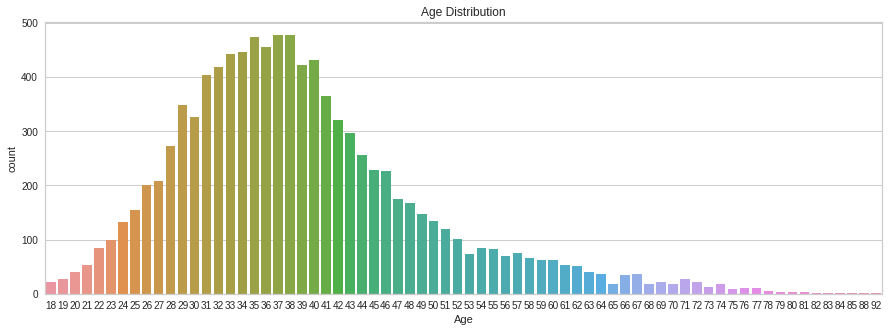

In [15]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x ='Age', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show();

In [18]:
df=pd.get_dummies(df,drop_first=True)
df

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


# Preprocessing of Data
- Train | Test Split, Scalling

In [19]:
X=df.drop(["Exited"], axis=1)
y=df["Exited"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=5)

In [22]:
scaler= MinMaxScaler() 

In [23]:
X_train_scaled = scaler.fit_transform(X_train)

In [24]:
X_test_scaled = scaler.transform(X_test)

# Modelling & Model Performance

In [25]:
log_model = LogisticRegression()

In [26]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
y_pred=log_model.predict(X_test_scaled)

In [28]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [29]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [30]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[1542   51]
 [ 325   82]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1593
           1       0.62      0.20      0.30       407

    accuracy                           0.81      2000
   macro avg       0.72      0.58      0.60      2000
weighted avg       0.78      0.81      0.77      2000


Train_Set
[[6178  192]
 [1309  321]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6370
           1       0.63      0.20      0.30      1630

    accuracy                           0.81      8000
   macro avg       0.73      0.58      0.60      8000
weighted avg       0.78      0.81      0.77      8000



In [32]:
model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.132810,0.013798,0.688889,0.190184,0.298077,0.81750
2,0.108535,0.010989,0.625000,0.184049,0.284360,0.81125
3,0.100682,0.014422,0.575000,0.141104,0.226601,0.80375
4,0.126092,0.015439,0.522727,0.141104,0.222222,0.79875
5,0.097282,0.014180,0.616667,0.226994,0.331839,0.81375
6,0.137220,0.019230,0.596491,0.208589,0.309091,0.81000
7,0.193739,0.013102,0.610169,0.220859,0.324324,0.81250
8,0.166904,0.014873,0.611111,0.202454,0.304147,0.81125
9,0.163291,0.015754,0.745098,0.233129,0.355140,0.82750
10,0.131662,0.014975,0.518519,0.171779,0.258065,0.79875


In [33]:
df_scores.mean()

fit_time          0.135822
score_time        0.014676
test_precision    0.610967
test_recall       0.192025
test_f1           0.291387
test_accuracy     0.810500
dtype: float64

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [43]:
X_train.shape

(8000, 12)

## without class_weigth

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [41]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

### Create The Model

In [58]:
seed= 42

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

In [62]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [63]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
225/225 [==============================] - 3s 7ms/step - loss: 154812.3438 - accuracy: 0.6808 - val_loss: 8.7589 - val_accuracy: 0.8062
Epoch 2/1000
225/225 [==============================] - 1s 4ms/step - loss: 18917.6445 - accuracy: 0.7414 - val_loss: 0.6021 - val_accuracy: 0.8062
Epoch 3/1000
225/225 [==============================] - 1s 3ms/step - loss: 5956.6182 - accuracy: 0.7547 - val_loss: 0.5662 - val_accuracy: 0.8062
Epoch 4/1000
225/225 [==============================] - 1s 3ms/step - loss: 2491.5962 - accuracy: 0.7613 - val_loss: 0.5417 - val_accuracy: 0.8062
Epoch 5/1000
225/225 [==============================] - 1s 3ms/step - loss: 1461.7301 - accuracy: 0.7629 - val_loss: 0.5245 - val_accuracy: 0.8062
Epoch 6/1000
225/225 [==============================] - 1s 3ms/step - loss: 1209.8535 - accuracy: 0.7725 - val_loss: 0.5150 - val_accuracy: 0.8062
Epoch 7/1000
225/225 [==============================] - 1s 3ms/step - loss: 551.4219 - accuracy: 0.7749 - val_loss:

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

### Add Early Stop

In [48]:
seed = 42

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [50]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [51]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
225/225 [==============================] - 2s 4ms/step - loss: 4729.2300 - accuracy: 0.6719 - val_loss: 1567.5164 - val_accuracy: 0.8050
Epoch 2/1000
225/225 [==============================] - 1s 6ms/step - loss: 2560.3813 - accuracy: 0.6744 - val_loss: 1546.5757 - val_accuracy: 0.8062
Epoch 3/1000
225/225 [==============================] - 2s 7ms/step - loss: 3884.7693 - accuracy: 0.6771 - val_loss: 2230.1482 - val_accuracy: 0.1937
Epoch 4/1000
225/225 [==============================] - 1s 6ms/step - loss: 3051.7058 - accuracy: 0.6765 - val_loss: 1676.5920 - val_accuracy: 0.8062
Epoch 5/1000
225/225 [==============================] - 1s 6ms/step - loss: 2355.6067 - accuracy: 0.6783 - val_loss: 316.6895 - val_accuracy: 0.5688
Epoch 6/1000
225/225 [==============================] - 1s 5ms/step - loss: 2097.3716 - accuracy: 0.6789 - val_loss: 1497.0442 - val_accuracy: 0.8062
Epoch 7/1000
225/225 [==============================] - 1s 5ms/step - loss: 2562.0605 - accuracy: 0.6

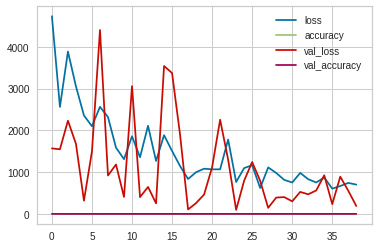

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [53]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  98.56060791015625
accuracy :  0.6470000147819519


In [55]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1177  416]
 [ 290  117]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1593
           1       0.22      0.29      0.25       407

    accuracy                           0.65      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.68      0.65      0.66      2000



#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : [C,1],
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1)

In [35]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                               1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [36]:
grid_model.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

In [37]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)  


Test_Set
[[1535   58]
 [ 323   84]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.59      0.21      0.31       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.60      2000
weighted avg       0.78      0.81      0.77      2000


Train_Set
[[6164  206]
 [1301  329]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6370
           1       0.61      0.20      0.30      1630

    accuracy                           0.81      8000
   macro avg       0.72      0.58      0.60      8000
weighted avg       0.78      0.81      0.77      8000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

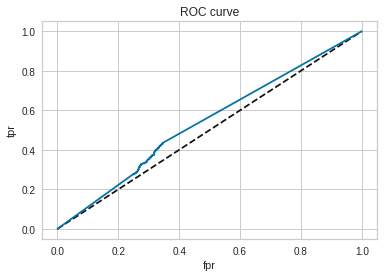

In [56]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [57]:
roc_auc_score(y_test, y_pred_proba)

0.537940868449343

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___